In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from sklearn.linear_model import LogisticRegression

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
pd.options.display.max_columns=1000

In [6]:
#Picking 1 of the Lego tables that has a list of all sets by set_num and theme_id. Just to try the regression.
sets = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone2/lego/sets.csv')
sets.head()

,set_num,name,year,theme_id,num_parts
0,00-1,Weetabix Castle,1970,414,471
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [7]:
sets['set_num'].str.len()

0         4
1         6
2         6
3         6
4         6
         ..
11668    11
11669    12
11670    11
11671    13
11672     7
Name: set_num, Length: 11673, dtype: int64

In [8]:
sets['set_num_len'] = sets['set_num'].str.len()
sets.head()

,set_num,name,year,theme_id,num_parts,set_num_len
0,00-1,Weetabix Castle,1970,414,471,4
1,0011-2,Town Mini-Figures,1978,84,12,6
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2,6
3,0012-1,Space Mini-Figures,1979,143,12,6
4,0013-1,Space Mini-Figures,1979,143,12,6


In [9]:
sets['name'].str.len()

0        15
1        17
2        26
3        18
4        18
         ..
11668    62
11669    17
11670    58
11671    30
11672    35
Name: name, Length: 11673, dtype: int64

In [10]:
sets['name_len'] = sets['name'].str.len()
sets.head()

,set_num,name,year,theme_id,num_parts,set_num_len,name_len
0,00-1,Weetabix Castle,1970,414,471,4,15
1,0011-2,Town Mini-Figures,1978,84,12,6,17
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2,6,26
3,0012-1,Space Mini-Figures,1979,143,12,6,18
4,0013-1,Space Mini-Figures,1979,143,12,6,18


In [11]:
feature_names = ['set_num_len', 'name_len', 'year', 'num_parts']
X = sets[feature_names]
y = sets['theme_id']
model = LogisticRegression()
model.fit(X, y)
model.score(X, y)

C:\Users\marki\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.056455067249207576

In [12]:
#Bring in the themes table so I can put a theme name to the set numbers 
themes = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone2/lego/themes.csv')
themes.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [13]:
themes = themes.rename(columns={'id':'theme_id', 'name':'theme_name'})
themes.head()

,theme_id,theme_name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [14]:
#parent_id column is not needed
themes = themes.drop('parent_id', axis=1)
themes.head()

,theme_id,theme_name
0,1,Technic
1,2,Arctic Technic
2,3,Competition
3,4,Expert Builder
4,5,Model


In [15]:
df = sets.merge(themes, on='theme_id', how='left')
df.head()

,set_num,name,year,theme_id,num_parts,set_num_len,name_len,theme_name
0,00-1,Weetabix Castle,1970,414,471,4,15,Castle
1,0011-2,Town Mini-Figures,1978,84,12,6,17,Supplemental
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2,6,26,Lion Knights
3,0012-1,Space Mini-Figures,1979,143,12,6,18,Supplemental
4,0013-1,Space Mini-Figures,1979,143,12,6,18,Supplemental


In [16]:
df.shape

(11673, 8)

In [17]:
X = df[feature_names]
y = df['theme_id']
model = LogisticRegression()
model.fit(X, y)
model.score(X, y)

C:\Users\marki\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.056455067249207576

In [18]:
# List of the most used themes
df['theme_id'].value_counts()

501    246
371    240
504    219
220    216
494    192
      ... 
279      1
531      1
44       1
124      1
607      1
Name: theme_id, Length: 575, dtype: int64

In [19]:
# Gear as a theme doesn't really help identify the set - gears can be used in many sets
themes[themes['theme_id'] == 501]

,theme_id,theme_name
500,501,Gear


In [20]:
# Supplemental as a theme also doesn't help identify a set.
themes[themes['theme_id'] == 371]

,theme_id,theme_name
370,371,Supplemental


In [21]:
# Duplo is quite different from regular Lego bricks and a duplo brick is easily identifiable to a duplo set.
themes[themes['theme_id'] == 504]

,theme_id,theme_name
503,504,Duplo


In [22]:
# City as a theme is rich with many sets. I think this is the one I should use.
themes[themes['theme_id'] == 220]

,theme_id,theme_name
219,220,City


In [23]:
df['is_city'] = df['theme_id'] == 220
df.head()

,set_num,name,year,theme_id,num_parts,set_num_len,name_len,theme_name,is_city
0,00-1,Weetabix Castle,1970,414,471,4,15,Castle,False
1,0011-2,Town Mini-Figures,1978,84,12,6,17,Supplemental,False
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2,6,26,Lion Knights,False
3,0012-1,Space Mini-Figures,1979,143,12,6,18,Supplemental,False
4,0013-1,Space Mini-Figures,1979,143,12,6,18,Supplemental,False


In [24]:
df[df['theme_id'] == 220]

,set_num,name,year,theme_id,num_parts,set_num_len,name_len,theme_name,is_city
1798,2824-10,Advent Calendar 2010 City (Day 9) Toy Airplane,2010,220,11,7,46,City,True
1799,2824-11,Advent Calendar 2010 City (Day 10) Man with Su...,2010,220,5,7,52,City,True
1800,2824-12,Advent Calendar 2010 City (Day 11) Fireplace,2010,220,13,7,44,City,True
1801,2824-13,Advent Calendar 2010 City (Day 12) Sled with W...,2010,220,14,7,57,City,True
1802,2824-14,Advent Calendar 2010 City (Day 13) Toy Fire Truck,2010,220,15,7,49,City,True
...,...,...,...,...,...,...,...,...,...
8856,7907-5,Advent Calendar 2007 City (Day 4) Constructio...,2007,220,5,6,66,City,True
8857,7907-6,Advent Calendar 2007 City (Day 5) Barricade,2007,220,12,6,44,City,True
8858,7907-7,Advent Calendar 2007 City (Day 6) Directional...,2007,220,22,6,51,City,True
8859,7907-8,Advent Calendar 2007 City (Day 7) Airline Wor...,2007,220,5,6,59,City,True


In [25]:
df = pd.get_dummies(df, columns=['is_city'])
df.head()

,set_num,name,year,theme_id,num_parts,set_num_len,name_len,theme_name,is_city_False,is_city_True
0,00-1,Weetabix Castle,1970,414,471,4,15,Castle,1,0
1,0011-2,Town Mini-Figures,1978,84,12,6,17,Supplemental,1,0
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2,6,26,Lion Knights,1,0
3,0012-1,Space Mini-Figures,1979,143,12,6,18,Supplemental,1,0
4,0013-1,Space Mini-Figures,1979,143,12,6,18,Supplemental,1,0


In [26]:
feature_names = ['year', 'num_parts', 'set_num_len', 'name_len']
X = df[feature_names]
y = df['is_city_True']
model = LogisticRegression()
model.fit(X, y)
model.score(X, y)

0.9806390816413947

In [27]:
inventories = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone2/lego/inventories.csv')
inventories.head()

,id,version,set_num
0,1,1,7922-1
1,3,1,3931-1
2,4,1,6942-1
3,15,1,5158-1
4,16,1,903-1


In [28]:
inventories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11681 entries, 0 to 11680
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       11681 non-null  int64 
 1   version  11681 non-null  int64 
 2   set_num  11681 non-null  object
dtypes: int64(2), object(1)
memory usage: 273.9+ KB


In [29]:
inventories.shape

(11681, 3)

In [30]:
df.shape

(11673, 10)

In [31]:
df = df.merge(inventories, on='set_num', how='left')
df.head()

,set_num,name,year,theme_id,num_parts,set_num_len,name_len,theme_name,is_city_False,is_city_True,id,version
0,00-1,Weetabix Castle,1970,414,471,4,15,Castle,1,0,5574.0,1.0
1,0011-2,Town Mini-Figures,1978,84,12,6,17,Supplemental,1,0,5087.0,1.0
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2,6,26,Lion Knights,1,0,2216.0,1.0
3,0012-1,Space Mini-Figures,1979,143,12,6,18,Supplemental,1,0,1414.0,1.0
4,0013-1,Space Mini-Figures,1979,143,12,6,18,Supplemental,1,0,4609.0,1.0


In [32]:
df.shape

(11684, 12)

In [33]:
df = df.drop('version', axis=1)
df.head()

,set_num,name,year,theme_id,num_parts,set_num_len,name_len,theme_name,is_city_False,is_city_True,id
0,00-1,Weetabix Castle,1970,414,471,4,15,Castle,1,0,5574.0
1,0011-2,Town Mini-Figures,1978,84,12,6,17,Supplemental,1,0,5087.0
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2,6,26,Lion Knights,1,0,2216.0
3,0012-1,Space Mini-Figures,1979,143,12,6,18,Supplemental,1,0,1414.0
4,0013-1,Space Mini-Figures,1979,143,12,6,18,Supplemental,1,0,4609.0


In [34]:
inventory_parts = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone2/lego/inventory_parts.csv')
inventory_parts.head()

,inventory_id,part_num,color_id,quantity,is_spare
0,1,48379c01,72,1,f
1,1,48395,7,1,f
2,1,mcsport6,25,1,f
3,1,paddle,0,1,f
4,3,11816pr0005,78,1,f


In [35]:
inventory_parts = inventory_parts.rename(columns={'inventory_id':'id'})
inventory_parts.head()

,id,part_num,color_id,quantity,is_spare
0,1,48379c01,72,1,f
1,1,48395,7,1,f
2,1,mcsport6,25,1,f
3,1,paddle,0,1,f
4,3,11816pr0005,78,1,f


In [36]:
inventory_parts.shape

(580251, 5)

In [37]:
inventory_parts['quantity']

0         1
1         1
2         1
3         1
4         1
         ..
580246    3
580247    4
580248    4
580249    9
580250    5
Name: quantity, Length: 580251, dtype: int64

In [38]:
colors = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone2/lego/colors.csv')
colors.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [39]:
colors = colors.rename(columns={'id':'color_id', 'name':'color_name'})
colors.head()

,color_id,color_name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [40]:
colors.shape

(135, 4)

In [41]:
dfB = inventory_parts.merge(colors, on='color_id', how='left')
dfB.head()

,id,part_num,color_id,quantity,is_spare,color_name,rgb,is_trans
0,1,48379c01,72,1,f,Dark Bluish Gray,6C6E68,f
1,1,48395,7,1,f,Light Gray,9BA19D,f
2,1,mcsport6,25,1,f,Orange,FE8A18,f
3,1,paddle,0,1,f,Black,05131D,f
4,3,11816pr0005,78,1,f,Light Flesh,F6D7B3,f


In [42]:
dfB.shape

(580251, 8)

In [43]:
dfB.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 580251 entries, 0 to 580250
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id          580251 non-null  int64 
 1   part_num    580251 non-null  object
 2   color_id    580251 non-null  int64 
 3   quantity    580251 non-null  int64 
 4   is_spare    580251 non-null  object
 5   color_name  580251 non-null  object
 6   rgb         580251 non-null  object
 7   is_trans    580251 non-null  object
dtypes: int64(3), object(5)
memory usage: 39.8+ MB


In [44]:
parts = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone2/lego/parts.csv')
parts.head()

,part_num,name,part_cat_id
0,0687b1,Set 0687 Activity Booklet 1,17
1,0901,Baseplate 16 x 30 with Set 080 Yellow House Print,1
2,0902,Baseplate 16 x 24 with Set 080 Small White Hou...,1
3,0903,Baseplate 16 x 24 with Set 080 Red House Print,1
4,0904,Baseplate 16 x 24 with Set 080 Large White Hou...,1


In [45]:
parts = parts.rename(columns={'name':'part_name'})
parts.head()

,part_num,part_name,part_cat_id
0,0687b1,Set 0687 Activity Booklet 1,17
1,0901,Baseplate 16 x 30 with Set 080 Yellow House Print,1
2,0902,Baseplate 16 x 24 with Set 080 Small White Hou...,1
3,0903,Baseplate 16 x 24 with Set 080 Red House Print,1
4,0904,Baseplate 16 x 24 with Set 080 Large White Hou...,1


In [46]:
parts.shape

(25993, 3)

In [47]:
dfB = dfB.merge(parts, on='part_num', how='left')
dfB.head()

,id,part_num,color_id,quantity,is_spare,color_name,rgb,is_trans,part_name,part_cat_id
0,1,48379c01,72,1,f,Dark Bluish Gray,6C6E68,f,Sports Promo Figure Base with Feet,27.0
1,1,48395,7,1,f,Light Gray,9BA19D,f,Sports Promo Snowboard from McDonald's Sports ...,27.0
2,1,mcsport6,25,1,f,Orange,FE8A18,f,Sports Promo Figure Head Torso Assembly McDona...,13.0
3,1,paddle,0,1,f,Black,05131D,f,Sports Promo Paddle from McDonald's Sports Sets,27.0
4,3,11816pr0005,78,1,f,Light Flesh,F6D7B3,f,"Minifig Head Modified - Friends - Green Eyes, ...",13.0


In [48]:
dfB.shape

(580251, 10)

In [49]:
dfB.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 580251 entries, 0 to 580250
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   id           580251 non-null  int64  
 1   part_num     580251 non-null  object 
 2   color_id     580251 non-null  int64  
 3   quantity     580251 non-null  int64  
 4   is_spare     580251 non-null  object 
 5   color_name   580251 non-null  object 
 6   rgb          580251 non-null  object 
 7   is_trans     580251 non-null  object 
 8   part_name    580069 non-null  object 
 9   part_cat_id  580069 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 48.7+ MB


In [50]:
dfB = dfB.drop('is_spare', axis=1)

In [51]:
dfB = dfB.drop('rgb', axis=1)

In [52]:
dfB = dfB.drop('part_cat_id', axis=1)
dfB.head()

,id,part_num,color_id,quantity,color_name,is_trans,part_name
0,1,48379c01,72,1,Dark Bluish Gray,f,Sports Promo Figure Base with Feet
1,1,48395,7,1,Light Gray,f,Sports Promo Snowboard from McDonald's Sports ...
2,1,mcsport6,25,1,Orange,f,Sports Promo Figure Head Torso Assembly McDona...
3,1,paddle,0,1,Black,f,Sports Promo Paddle from McDonald's Sports Sets
4,3,11816pr0005,78,1,Light Flesh,f,"Minifig Head Modified - Friends - Green Eyes, ..."


In [53]:
dfB = pd.get_dummies(dfB, columns=['is_trans'])
dfB.head()

,id,part_num,color_id,quantity,color_name,part_name,is_trans_f,is_trans_t
0,1,48379c01,72,1,Dark Bluish Gray,Sports Promo Figure Base with Feet,1,0
1,1,48395,7,1,Light Gray,Sports Promo Snowboard from McDonald's Sports ...,1,0
2,1,mcsport6,25,1,Orange,Sports Promo Figure Head Torso Assembly McDona...,1,0
3,1,paddle,0,1,Black,Sports Promo Paddle from McDonald's Sports Sets,1,0
4,3,11816pr0005,78,1,Light Flesh,"Minifig Head Modified - Friends - Green Eyes, ...",1,0


In [54]:
dfB.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 580251 entries, 0 to 580250
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id          580251 non-null  int64 
 1   part_num    580251 non-null  object
 2   color_id    580251 non-null  int64 
 3   quantity    580251 non-null  int64 
 4   color_name  580251 non-null  object
 5   part_name   580069 non-null  object
 6   is_trans_f  580251 non-null  uint8 
 7   is_trans_t  580251 non-null  uint8 
dtypes: int64(3), object(3), uint8(2)
memory usage: 32.1+ MB


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11684 entries, 0 to 11683
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   set_num        11684 non-null  object 
 1   name           11684 non-null  object 
 2   year           11684 non-null  int64  
 3   theme_id       11684 non-null  int64  
 4   num_parts      11684 non-null  int64  
 5   set_num_len    11684 non-null  int64  
 6   name_len       11684 non-null  int64  
 7   theme_name     11684 non-null  object 
 8   is_city_False  11684 non-null  uint8  
 9   is_city_True   11684 non-null  uint8  
 10  id             11681 non-null  float64
dtypes: float64(1), int64(5), object(3), uint8(2)
memory usage: 935.6+ KB


In [56]:
dfB['part_name'].isnull().sum()

182

In [57]:
dfB[dfB.isnull().any(axis=1)].head()

,id,part_num,color_id,quantity,color_name,part_name,is_trans_f,is_trans_t
1215,56,48002,0,4,Black,NaN,1,0
8411,234,2476,71,1,Light Bluish Gray,NaN,1,0
20611,609,3650,7,3,Light Gray,NaN,1,0
20836,618,rb00164,0,2,Black,NaN,1,0
20914,621,2476,28,3,Dark Tan,NaN,1,0


In [58]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11681 entries, 0 to 11683
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   set_num        11681 non-null  object 
 1   name           11681 non-null  object 
 2   year           11681 non-null  int64  
 3   theme_id       11681 non-null  int64  
 4   num_parts      11681 non-null  int64  
 5   set_num_len    11681 non-null  int64  
 6   name_len       11681 non-null  int64  
 7   theme_name     11681 non-null  object 
 8   is_city_False  11681 non-null  uint8  
 9   is_city_True   11681 non-null  uint8  
 10  id             11681 non-null  float64
dtypes: float64(1), int64(5), object(3), uint8(2)
memory usage: 935.4+ KB


In [59]:
dfB = dfB.fillna('None')
dfB.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 580251 entries, 0 to 580250
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id          580251 non-null  int64 
 1   part_num    580251 non-null  object
 2   color_id    580251 non-null  int64 
 3   quantity    580251 non-null  int64 
 4   color_name  580251 non-null  object
 5   part_name   580251 non-null  object
 6   is_trans_f  580251 non-null  uint8 
 7   is_trans_t  580251 non-null  uint8 
dtypes: int64(3), object(3), uint8(2)
memory usage: 32.1+ MB


In [60]:
dfB[dfB['part_name'] == 'None']

,id,part_num,color_id,quantity,color_name,part_name,is_trans_f,is_trans_t
1215,56,48002,0,4,Black,None,1,0
8411,234,2476,71,1,Light Bluish Gray,None,1,0
20611,609,3650,7,3,Light Gray,None,1,0
20836,618,rb00164,0,2,Black,None,1,0
20914,621,2476,28,3,Dark Tan,None,1,0
...,...,...,...,...,...,...,...,...
531250,15582,3650,7,8,Light Gray,None,1,0
533485,15624,rb00164,0,1,Black,None,1,0
555165,16315,4502w,14,1,Yellow,None,1,0
556394,16351,rb00164,0,1,Black,None,1,0


In [61]:
df = df.merge(dfB, on='id', how='inner')
df.head()

,set_num,name,year,theme_id,num_parts,set_num_len,name_len,theme_name,is_city_False,is_city_True,id,part_num,color_id,quantity,color_name,part_name,is_trans_f,is_trans_t
0,00-1,Weetabix Castle,1970,414,471,4,15,Castle,1,0,5574.0,29c01,4,8,Red,Window 1 x 1 x 2 with Glass,1,0
1,00-1,Weetabix Castle,1970,414,471,4,15,Castle,1,0,5574.0,29c01,15,6,White,Window 1 x 1 x 2 with Glass,1,0
2,00-1,Weetabix Castle,1970,414,471,4,15,Castle,1,0,5574.0,3001a,15,25,White,Brick 2 x 4 without Cross Supports,1,0
3,00-1,Weetabix Castle,1970,414,471,4,15,Castle,1,0,5574.0,3001a,4,9,Red,Brick 2 x 4 without Cross Supports,1,0
4,00-1,Weetabix Castle,1970,414,471,4,15,Castle,1,0,5574.0,3001a,1,4,Blue,Brick 2 x 4 without Cross Supports,1,0


In [62]:
df.shape

(580251, 18)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 580251 entries, 0 to 580250
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   set_num        580251 non-null  object 
 1   name           580251 non-null  object 
 2   year           580251 non-null  int64  
 3   theme_id       580251 non-null  int64  
 4   num_parts      580251 non-null  int64  
 5   set_num_len    580251 non-null  int64  
 6   name_len       580251 non-null  int64  
 7   theme_name     580251 non-null  object 
 8   is_city_False  580251 non-null  uint8  
 9   is_city_True   580251 non-null  uint8  
 10  id             580251 non-null  float64
 11  part_num       580251 non-null  object 
 12  color_id       580251 non-null  int64  
 13  quantity       580251 non-null  int64  
 14  color_name     580251 non-null  object 
 15  part_name      580251 non-null  object 
 16  is_trans_f     580251 non-null  uint8  
 17  is_trans_t     580251 non-nul

In [64]:
df = df.drop('is_city_False', axis=1)
df.head()

,set_num,name,year,theme_id,num_parts,set_num_len,name_len,theme_name,is_city_True,id,part_num,color_id,quantity,color_name,part_name,is_trans_f,is_trans_t
0,00-1,Weetabix Castle,1970,414,471,4,15,Castle,0,5574.0,29c01,4,8,Red,Window 1 x 1 x 2 with Glass,1,0
1,00-1,Weetabix Castle,1970,414,471,4,15,Castle,0,5574.0,29c01,15,6,White,Window 1 x 1 x 2 with Glass,1,0
2,00-1,Weetabix Castle,1970,414,471,4,15,Castle,0,5574.0,3001a,15,25,White,Brick 2 x 4 without Cross Supports,1,0
3,00-1,Weetabix Castle,1970,414,471,4,15,Castle,0,5574.0,3001a,4,9,Red,Brick 2 x 4 without Cross Supports,1,0
4,00-1,Weetabix Castle,1970,414,471,4,15,Castle,0,5574.0,3001a,1,4,Blue,Brick 2 x 4 without Cross Supports,1,0


In [65]:
df = df.drop('is_trans_f', axis=1)
df.head()

,set_num,name,year,theme_id,num_parts,set_num_len,name_len,theme_name,is_city_True,id,part_num,color_id,quantity,color_name,part_name,is_trans_t
0,00-1,Weetabix Castle,1970,414,471,4,15,Castle,0,5574.0,29c01,4,8,Red,Window 1 x 1 x 2 with Glass,0
1,00-1,Weetabix Castle,1970,414,471,4,15,Castle,0,5574.0,29c01,15,6,White,Window 1 x 1 x 2 with Glass,0
2,00-1,Weetabix Castle,1970,414,471,4,15,Castle,0,5574.0,3001a,15,25,White,Brick 2 x 4 without Cross Supports,0
3,00-1,Weetabix Castle,1970,414,471,4,15,Castle,0,5574.0,3001a,4,9,Red,Brick 2 x 4 without Cross Supports,0
4,00-1,Weetabix Castle,1970,414,471,4,15,Castle,0,5574.0,3001a,1,4,Blue,Brick 2 x 4 without Cross Supports,0


In [66]:
df = df.rename(columns={'name':'set_name'})
df.head()

,set_num,set_name,year,theme_id,num_parts,set_num_len,name_len,theme_name,is_city_True,id,part_num,color_id,quantity,color_name,part_name,is_trans_t
0,00-1,Weetabix Castle,1970,414,471,4,15,Castle,0,5574.0,29c01,4,8,Red,Window 1 x 1 x 2 with Glass,0
1,00-1,Weetabix Castle,1970,414,471,4,15,Castle,0,5574.0,29c01,15,6,White,Window 1 x 1 x 2 with Glass,0
2,00-1,Weetabix Castle,1970,414,471,4,15,Castle,0,5574.0,3001a,15,25,White,Brick 2 x 4 without Cross Supports,0
3,00-1,Weetabix Castle,1970,414,471,4,15,Castle,0,5574.0,3001a,4,9,Red,Brick 2 x 4 without Cross Supports,0
4,00-1,Weetabix Castle,1970,414,471,4,15,Castle,0,5574.0,3001a,1,4,Blue,Brick 2 x 4 without Cross Supports,0


In [67]:
df = df.rename(columns={'name_len':'set_name_len'})
df.head()

,set_num,set_name,year,theme_id,num_parts,set_num_len,set_name_len,theme_name,is_city_True,id,part_num,color_id,quantity,color_name,part_name,is_trans_t
0,00-1,Weetabix Castle,1970,414,471,4,15,Castle,0,5574.0,29c01,4,8,Red,Window 1 x 1 x 2 with Glass,0
1,00-1,Weetabix Castle,1970,414,471,4,15,Castle,0,5574.0,29c01,15,6,White,Window 1 x 1 x 2 with Glass,0
2,00-1,Weetabix Castle,1970,414,471,4,15,Castle,0,5574.0,3001a,15,25,White,Brick 2 x 4 without Cross Supports,0
3,00-1,Weetabix Castle,1970,414,471,4,15,Castle,0,5574.0,3001a,4,9,Red,Brick 2 x 4 without Cross Supports,0
4,00-1,Weetabix Castle,1970,414,471,4,15,Castle,0,5574.0,3001a,1,4,Blue,Brick 2 x 4 without Cross Supports,0


In [68]:
df['theme_name_len'] = df['theme_name'].str.len()
df.head()

,set_num,set_name,year,theme_id,num_parts,set_num_len,set_name_len,theme_name,is_city_True,id,part_num,color_id,quantity,color_name,part_name,is_trans_t,theme_name_len
0,00-1,Weetabix Castle,1970,414,471,4,15,Castle,0,5574.0,29c01,4,8,Red,Window 1 x 1 x 2 with Glass,0,6
1,00-1,Weetabix Castle,1970,414,471,4,15,Castle,0,5574.0,29c01,15,6,White,Window 1 x 1 x 2 with Glass,0,6
2,00-1,Weetabix Castle,1970,414,471,4,15,Castle,0,5574.0,3001a,15,25,White,Brick 2 x 4 without Cross Supports,0,6
3,00-1,Weetabix Castle,1970,414,471,4,15,Castle,0,5574.0,3001a,4,9,Red,Brick 2 x 4 without Cross Supports,0,6
4,00-1,Weetabix Castle,1970,414,471,4,15,Castle,0,5574.0,3001a,1,4,Blue,Brick 2 x 4 without Cross Supports,0,6


In [69]:
df['part_num_len'] = df['part_num'].str.len()
df.head()

,set_num,set_name,year,theme_id,num_parts,set_num_len,set_name_len,theme_name,is_city_True,id,part_num,color_id,quantity,color_name,part_name,is_trans_t,theme_name_len,part_num_len
0,00-1,Weetabix Castle,1970,414,471,4,15,Castle,0,5574.0,29c01,4,8,Red,Window 1 x 1 x 2 with Glass,0,6,5
1,00-1,Weetabix Castle,1970,414,471,4,15,Castle,0,5574.0,29c01,15,6,White,Window 1 x 1 x 2 with Glass,0,6,5
2,00-1,Weetabix Castle,1970,414,471,4,15,Castle,0,5574.0,3001a,15,25,White,Brick 2 x 4 without Cross Supports,0,6,5
3,00-1,Weetabix Castle,1970,414,471,4,15,Castle,0,5574.0,3001a,4,9,Red,Brick 2 x 4 without Cross Supports,0,6,5
4,00-1,Weetabix Castle,1970,414,471,4,15,Castle,0,5574.0,3001a,1,4,Blue,Brick 2 x 4 without Cross Supports,0,6,5


In [70]:
df['color_name_len'] = df['color_name'].str.len()
df.head()

,set_num,set_name,year,theme_id,num_parts,set_num_len,set_name_len,theme_name,is_city_True,id,part_num,color_id,quantity,color_name,part_name,is_trans_t,theme_name_len,part_num_len,color_name_len
0,00-1,Weetabix Castle,1970,414,471,4,15,Castle,0,5574.0,29c01,4,8,Red,Window 1 x 1 x 2 with Glass,0,6,5,3
1,00-1,Weetabix Castle,1970,414,471,4,15,Castle,0,5574.0,29c01,15,6,White,Window 1 x 1 x 2 with Glass,0,6,5,5
2,00-1,Weetabix Castle,1970,414,471,4,15,Castle,0,5574.0,3001a,15,25,White,Brick 2 x 4 without Cross Supports,0,6,5,5
3,00-1,Weetabix Castle,1970,414,471,4,15,Castle,0,5574.0,3001a,4,9,Red,Brick 2 x 4 without Cross Supports,0,6,5,3
4,00-1,Weetabix Castle,1970,414,471,4,15,Castle,0,5574.0,3001a,1,4,Blue,Brick 2 x 4 without Cross Supports,0,6,5,4


In [71]:
df['part_name_len'] = df['part_name'].str.len()
df.head()

,set_num,set_name,year,theme_id,num_parts,set_num_len,set_name_len,theme_name,is_city_True,id,part_num,color_id,quantity,color_name,part_name,is_trans_t,theme_name_len,part_num_len,color_name_len,part_name_len
0,00-1,Weetabix Castle,1970,414,471,4,15,Castle,0,5574.0,29c01,4,8,Red,Window 1 x 1 x 2 with Glass,0,6,5,3,27
1,00-1,Weetabix Castle,1970,414,471,4,15,Castle,0,5574.0,29c01,15,6,White,Window 1 x 1 x 2 with Glass,0,6,5,5,27
2,00-1,Weetabix Castle,1970,414,471,4,15,Castle,0,5574.0,3001a,15,25,White,Brick 2 x 4 without Cross Supports,0,6,5,5,34
3,00-1,Weetabix Castle,1970,414,471,4,15,Castle,0,5574.0,3001a,4,9,Red,Brick 2 x 4 without Cross Supports,0,6,5,3,34
4,00-1,Weetabix Castle,1970,414,471,4,15,Castle,0,5574.0,3001a,1,4,Blue,Brick 2 x 4 without Cross Supports,0,6,5,4,34


In [72]:
df = df.rename(columns={'is_city_True':'is_city', 'is_trans_t':'is_trans'})
df.head(3)

,set_num,set_name,year,theme_id,num_parts,set_num_len,set_name_len,theme_name,is_city,id,part_num,color_id,quantity,color_name,part_name,is_trans,theme_name_len,part_num_len,color_name_len,part_name_len
0,00-1,Weetabix Castle,1970,414,471,4,15,Castle,0,5574.0,29c01,4,8,Red,Window 1 x 1 x 2 with Glass,0,6,5,3,27
1,00-1,Weetabix Castle,1970,414,471,4,15,Castle,0,5574.0,29c01,15,6,White,Window 1 x 1 x 2 with Glass,0,6,5,5,27
2,00-1,Weetabix Castle,1970,414,471,4,15,Castle,0,5574.0,3001a,15,25,White,Brick 2 x 4 without Cross Supports,0,6,5,5,34


In [73]:
is_train = np.random.rand(df.shape[0]) > 0.1
is_train.sum() / df.shape[0]

0.9003707016446331

In [74]:
is_city = df['is_city'].sum() / df.shape[0]
is_city

0.0031555309684946687

In [79]:
hyper_table = list()

In [80]:
feature_names = ['year']
X = df[feature_names]
y = df['is_city']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.1)
model = LogisticRegression()
model.fit(X_train, y_train)
s_train = model.score(X_train, y_train)
print(s_train)
s_test = model.score(X_test, y_test)
print(s_test)

0.9968385274546412
0.9968979423017268


In [81]:
y_pred = model.predict(X)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [82]:
y_pred.sum() / len(y_pred)

0.0

In [83]:
hyper_table.append(dict(desc = str(feature_names), train_score = s_train, test_score = s_test, C=model.C, model=model))
pd.DataFrame(hyper_table).sort_values('test_score')

,desc,train_score,test_score,C,model
0,['year'],0.996839,0.996898,1.0,LogisticRegression()


In [84]:
feature_names = ['year', 'num_parts']
X = df[feature_names]
y = df['is_city']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.1)
model = LogisticRegression()
model.fit(X_train, y_train)
s_train = model.score(X_train, y_train)
print(s_train)
s_test = model.score(X_test, y_test)
print(s_test)

0.9968155488534636
0.9971047461482784


In [85]:
hyper_table.append(dict(desc = str(feature_names), train_score = s_train, test_score = s_test, C=model.C, model=model))
pd.DataFrame(hyper_table).sort_values('test_score')

,desc,train_score,test_score,C,model
0,['year'],0.996839,0.996898,1.0,LogisticRegression()
1,"['year', 'num_parts']",0.996816,0.997105,1.0,LogisticRegression()


In [86]:
feature_names = ['year', 'num_parts', 'set_num_len']
X = df[feature_names]
y = df['is_city']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.1)
model = LogisticRegression()
model.fit(X_train, y_train)
s_train = model.score(X_train, y_train)
print(s_train)
s_test = model.score(X_test, y_test)
print(s_test)

0.99685001675523
0.996794540378451


In [87]:
hyper_table.append(dict(desc = str(feature_names), train_score = s_train, test_score = s_test, C=model.C, model=model))
pd.DataFrame(hyper_table).sort_values('test_score')

,desc,train_score,test_score,C,model
2,"['year', 'num_parts', 'set_num_len']",0.996850,0.996795,1.0,LogisticRegression()
0,['year'],0.996839,0.996898,1.0,LogisticRegression()
1,"['year', 'num_parts']",0.996816,0.997105,1.0,LogisticRegression()


In [88]:
feature_names = ['year', 'num_parts', 'set_num_len', 'set_name_len']
X = df[feature_names]
y = df['is_city']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.1)
model = LogisticRegression()
model.fit(X_train, y_train)
s_train = model.score(X_train, y_train)
print(s_train)
s_test = model.score(X_test, y_test)
print(s_test)

0.9966719325961032
0.9967083721090546


In [89]:
hyper_table.append(dict(desc = str(feature_names), train_score = s_train, test_score = s_test, C=model.C, model=model))
pd.DataFrame(hyper_table).sort_values('test_score')

,desc,train_score,test_score,C,model
3,"['year', 'num_parts', 'set_num_len', 'set_name...",0.996672,0.996708,1.0,LogisticRegression()
2,"['year', 'num_parts', 'set_num_len']",0.996850,0.996795,1.0,LogisticRegression()
0,['year'],0.996839,0.996898,1.0,LogisticRegression()
1,"['year', 'num_parts']",0.996816,0.997105,1.0,LogisticRegression()


In [90]:
feature_names = ['year', 'num_parts', 'set_num_len', 'set_name_len', 'color_id']
X = df[feature_names]
y = df['is_city']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.1)
model = LogisticRegression()
model.fit(X_train, y_train)
s_train = model.score(X_train, y_train)
print(s_train)
s_test = model.score(X_test, y_test)
print(s_test)

0.9966719325961032
0.9964498673008652


In [91]:
hyper_table.append(dict(desc = str(feature_names), train_score = s_train, test_score = s_test, C=model.C, model=model))
pd.DataFrame(hyper_table).sort_values('test_score')

,desc,train_score,test_score,C,model
4,"['year', 'num_parts', 'set_num_len', 'set_name...",0.996672,0.996450,1.0,LogisticRegression()
3,"['year', 'num_parts', 'set_num_len', 'set_name...",0.996672,0.996708,1.0,LogisticRegression()
2,"['year', 'num_parts', 'set_num_len']",0.996850,0.996795,1.0,LogisticRegression()
0,['year'],0.996839,0.996898,1.0,LogisticRegression()
1,"['year', 'num_parts']",0.996816,0.997105,1.0,LogisticRegression()


In [92]:
feature_names = ['year', 'num_parts', 'set_num_len', 'set_name_len', 'color_id', 'quantity']
X = df[feature_names]
y = df['is_city']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.1)
model = LogisticRegression()
model.fit(X_train, y_train)
s_train = model.score(X_train, y_train)
print(s_train)
s_test = model.score(X_test, y_test)
print(s_test)

0.9966623581789459
0.9964843346086237


In [93]:
hyper_table.append(dict(desc = str(feature_names), train_score = s_train, test_score = s_test, C=model.C, model=model))
pd.DataFrame(hyper_table).sort_values('test_score')

,desc,train_score,test_score,C,model
4,"['year', 'num_parts', 'set_num_len', 'set_name...",0.996672,0.996450,1.0,LogisticRegression()
5,"['year', 'num_parts', 'set_num_len', 'set_name...",0.996662,0.996484,1.0,LogisticRegression()
3,"['year', 'num_parts', 'set_num_len', 'set_name...",0.996672,0.996708,1.0,LogisticRegression()
2,"['year', 'num_parts', 'set_num_len']",0.996850,0.996795,1.0,LogisticRegression()
0,['year'],0.996839,0.996898,1.0,LogisticRegression()
1,"['year', 'num_parts']",0.996816,0.997105,1.0,LogisticRegression()


In [94]:
feature_names = ['year', 'num_parts', 'set_num_len', 'set_name_len', 'color_id', 'quantity', 'is_trans']
X = df[feature_names]
y = df['is_city']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.1)
model = LogisticRegression()
model.fit(X_train, y_train)
s_train = model.score(X_train, y_train)
print(s_train)
s_test = model.score(X_test, y_test)
print(s_test)

0.9966891665469865
0.9962775307620721


In [95]:
hyper_table.append(dict(desc = str(feature_names), train_score = s_train, test_score = s_test, C=model.C, model=model))
pd.DataFrame(hyper_table).sort_values('test_score')

,desc,train_score,test_score,C,model
6,"['year', 'num_parts', 'set_num_len', 'set_name...",0.996689,0.996278,1.0,LogisticRegression()
4,"['year', 'num_parts', 'set_num_len', 'set_name...",0.996672,0.996450,1.0,LogisticRegression()
5,"['year', 'num_parts', 'set_num_len', 'set_name...",0.996662,0.996484,1.0,LogisticRegression()
3,"['year', 'num_parts', 'set_num_len', 'set_name...",0.996672,0.996708,1.0,LogisticRegression()
2,"['year', 'num_parts', 'set_num_len']",0.996850,0.996795,1.0,LogisticRegression()
0,['year'],0.996839,0.996898,1.0,LogisticRegression()
1,"['year', 'num_parts']",0.996816,0.997105,1.0,LogisticRegression()


In [96]:
feature_names = ['year', 'num_parts', 'set_num_len', 'set_name_len', 'color_id', 'quantity', 'is_trans', 'theme_name_len']
X = df[feature_names]
y = df['is_city']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.1)
model = LogisticRegression()
model.fit(X_train, y_train)
s_train = model.score(X_train, y_train)
print(s_train)
s_test = model.score(X_test, y_test)
print(s_test)

0.9991708554741731
0.9991038499982766


C:\Users\marki\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [97]:
hyper_table.append(dict(desc = str(feature_names), train_score = s_train, test_score = s_test, C=model.C, model=model))
pd.DataFrame(hyper_table).sort_values('test_score')

,desc,train_score,test_score,C,model
6,"['year', 'num_parts', 'set_num_len', 'set_name...",0.996689,0.996278,1.0,LogisticRegression()
4,"['year', 'num_parts', 'set_num_len', 'set_name...",0.996672,0.996450,1.0,LogisticRegression()
5,"['year', 'num_parts', 'set_num_len', 'set_name...",0.996662,0.996484,1.0,LogisticRegression()
3,"['year', 'num_parts', 'set_num_len', 'set_name...",0.996672,0.996708,1.0,LogisticRegression()
2,"['year', 'num_parts', 'set_num_len']",0.996850,0.996795,1.0,LogisticRegression()
0,['year'],0.996839,0.996898,1.0,LogisticRegression()
1,"['year', 'num_parts']",0.996816,0.997105,1.0,LogisticRegression()
7,"['year', 'num_parts', 'set_num_len', 'set_name...",0.999171,0.999104,1.0,LogisticRegression()


In [98]:
feature_names = ['year', 'num_parts', 'set_num_len', 'set_name_len', 'color_id', 'quantity', 'is_trans', 'theme_name_len', 'part_num_len']
X = df[feature_names]
y = df['is_city']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.1)
model = LogisticRegression()
model.fit(X_train, y_train)
s_train = model.score(X_train, y_train)
print(s_train)
s_test = model.score(X_test, y_test)
print(s_test)

0.9992302168605486
0.999241719229311


C:\Users\marki\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [99]:
hyper_table.append(dict(desc = str(feature_names), train_score = s_train, test_score = s_test, C=model.C, model=model))
pd.DataFrame(hyper_table).sort_values('test_score')

,desc,train_score,test_score,C,model
6,"['year', 'num_parts', 'set_num_len', 'set_name...",0.996689,0.996278,1.0,LogisticRegression()
4,"['year', 'num_parts', 'set_num_len', 'set_name...",0.996672,0.996450,1.0,LogisticRegression()
5,"['year', 'num_parts', 'set_num_len', 'set_name...",0.996662,0.996484,1.0,LogisticRegression()
3,"['year', 'num_parts', 'set_num_len', 'set_name...",0.996672,0.996708,1.0,LogisticRegression()
2,"['year', 'num_parts', 'set_num_len']",0.996850,0.996795,1.0,LogisticRegression()
0,['year'],0.996839,0.996898,1.0,LogisticRegression()
1,"['year', 'num_parts']",0.996816,0.997105,1.0,LogisticRegression()
7,"['year', 'num_parts', 'set_num_len', 'set_name...",0.999171,0.999104,1.0,LogisticRegression()
8,"['year', 'num_parts', 'set_num_len', 'set_name...",0.999230,0.999242,1.0,LogisticRegression()


In [100]:
feature_names = ['year', 'num_parts', 'set_num_len', 'set_name_len', 'color_id', 'quantity', 'is_trans', 'theme_name_len', 'part_num_len', 'color_name_len']
X = df[feature_names]
y = df['is_city']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.1)
model = LogisticRegression()
model.fit(X_train, y_train)
s_train = model.score(X_train, y_train)
print(s_train)
s_test = model.score(X_test, y_test)
print(s_test)

0.9992283019771171
0.9993106538448282


C:\Users\marki\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [101]:
hyper_table.append(dict(desc = str(feature_names), train_score = s_train, test_score = s_test, C=model.C, model=model))
pd.DataFrame(hyper_table).sort_values('test_score')

,desc,train_score,test_score,C,model
6,"['year', 'num_parts', 'set_num_len', 'set_name...",0.996689,0.996278,1.0,LogisticRegression()
4,"['year', 'num_parts', 'set_num_len', 'set_name...",0.996672,0.996450,1.0,LogisticRegression()
5,"['year', 'num_parts', 'set_num_len', 'set_name...",0.996662,0.996484,1.0,LogisticRegression()
3,"['year', 'num_parts', 'set_num_len', 'set_name...",0.996672,0.996708,1.0,LogisticRegression()
2,"['year', 'num_parts', 'set_num_len']",0.996850,0.996795,1.0,LogisticRegression()
0,['year'],0.996839,0.996898,1.0,LogisticRegression()
1,"['year', 'num_parts']",0.996816,0.997105,1.0,LogisticRegression()
7,"['year', 'num_parts', 'set_num_len', 'set_name...",0.999171,0.999104,1.0,LogisticRegression()
8,"['year', 'num_parts', 'set_num_len', 'set_name...",0.999230,0.999242,1.0,LogisticRegression()
9,"['year', 'num_parts', 'set_num_len', 'set_name...",0.999228,0.999311,1.0,LogisticRegression()


In [102]:
feature_names = ['year', 'num_parts', 'set_num_len', 'set_name_len', 'color_id', 'quantity', 'is_trans', 'theme_name_len', 'part_num_len', 'color_name_len', 'part_name_len']
X = df[feature_names]
y = df['is_city']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.1)
model = LogisticRegression()
model.fit(X_train, y_train)
s_train = model.score(X_train, y_train)
print(s_train)
s_test = model.score(X_test, y_test)
print(s_test)

0.9992187275599598
0.9992761865370696


C:\Users\marki\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [103]:
hyper_table.append(dict(desc = str(feature_names), train_score = s_train, test_score = s_test, C=model.C, model=model))
pd.DataFrame(hyper_table).sort_values('test_score')

,desc,train_score,test_score,C,model
6,"['year', 'num_parts', 'set_num_len', 'set_name...",0.996689,0.996278,1.0,LogisticRegression()
4,"['year', 'num_parts', 'set_num_len', 'set_name...",0.996672,0.996450,1.0,LogisticRegression()
5,"['year', 'num_parts', 'set_num_len', 'set_name...",0.996662,0.996484,1.0,LogisticRegression()
3,"['year', 'num_parts', 'set_num_len', 'set_name...",0.996672,0.996708,1.0,LogisticRegression()
2,"['year', 'num_parts', 'set_num_len']",0.996850,0.996795,1.0,LogisticRegression()
0,['year'],0.996839,0.996898,1.0,LogisticRegression()
1,"['year', 'num_parts']",0.996816,0.997105,1.0,LogisticRegression()
7,"['year', 'num_parts', 'set_num_len', 'set_name...",0.999171,0.999104,1.0,LogisticRegression()
8,"['year', 'num_parts', 'set_num_len', 'set_name...",0.999230,0.999242,1.0,LogisticRegression()
10,"['year', 'num_parts', 'set_num_len', 'set_name...",0.999219,0.999276,1.0,LogisticRegression()


In [104]:
df.shape

(580251, 20)

In [105]:
df.head()


,set_num,set_name,year,theme_id,num_parts,set_num_len,set_name_len,theme_name,is_city,id,part_num,color_id,quantity,color_name,part_name,is_trans,theme_name_len,part_num_len,color_name_len,part_name_len
0,00-1,Weetabix Castle,1970,414,471,4,15,Castle,0,5574.0,29c01,4,8,Red,Window 1 x 1 x 2 with Glass,0,6,5,3,27
1,00-1,Weetabix Castle,1970,414,471,4,15,Castle,0,5574.0,29c01,15,6,White,Window 1 x 1 x 2 with Glass,0,6,5,5,27
2,00-1,Weetabix Castle,1970,414,471,4,15,Castle,0,5574.0,3001a,15,25,White,Brick 2 x 4 without Cross Supports,0,6,5,5,34
3,00-1,Weetabix Castle,1970,414,471,4,15,Castle,0,5574.0,3001a,4,9,Red,Brick 2 x 4 without Cross Supports,0,6,5,3,34
4,00-1,Weetabix Castle,1970,414,471,4,15,Castle,0,5574.0,3001a,1,4,Blue,Brick 2 x 4 without Cross Supports,0,6,5,4,34


In [106]:
X.shape

(580251, 11)

In [107]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [108]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt 

In [109]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

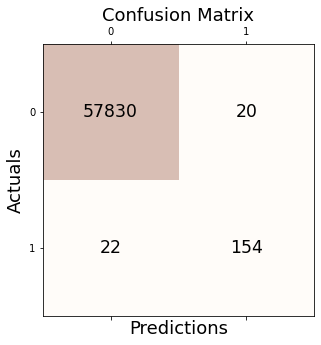

In [110]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [111]:
print('Precision: %.3f' % precision_score(y_test, y_pred))

Precision: 0.885


In [112]:
print('Recall: %.3f' % recall_score(y_test, y_pred))

Recall: 0.875


In [113]:
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.999


In [114]:
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

F1 Score: 0.880
